In [1]:
!pip install -r requirements.txt --user

In [2]:
import numpy                 as np
import pandas                as pd
import seaborn as sns
import matplotlib.pyplot as plt
import branca              
import geopandas

In [8]:
with open('data/1. Microdatos de Migracion Colombia (2021).csv') as f:
    df_migracion=pd.read_csv(f, delimiter=';', encoding="UTF-8")
    
df_migracion.shape

(121735, 22)

In [9]:
df_migracion.head()

,Motivo Viaje,Centro Regional,Puesto Migratorio,Tipo Transporte,Ciudad Hospedaje,Entrada Salida,Meses1,País Nacionalidad,Rango Edad,Colombiano/Extranjero,...,Año,Categoría Migratoria,Departamento1,País Destino Procedencia,Region Destino,Sexo1,Fac Exp,Fac Exp Femenino,Fac Exp Masculino,Número de registros
0,Turismo,Aeropuerto Eldorado,Aeropuerto Eldorado de Bogotá,Aéreo,Bogotá,Entradas,Septiembre,España,50-59,Extranjeros,...,2021,Permiso de Turismo,Bogotá,España,Europa,Femenino,37,37,0,1
1,Especial de Paz,Aeropuerto Eldorado,Aeropuerto Eldorado de Bogotá,Aéreo,Bogotá,Entradas,Febrero,Argentina,50-59,Extranjeros,...,2021,Visa Residencia,Bogotá,Argentina,América del Sur,Masculino,1,0,1,1
2,Tránsito,Aeropuerto Eldorado,Aeropuerto Eldorado de Bogotá,Aéreo,Bogotá,Entradas,Junio,México,30-39,Extranjeros,...,2021,Permiso Otras Actividades,Bogotá,República Dominicana,América Central y el Caribe,Femenino,1,1,0,1
3,Turismo,Aeropuerto Eldorado,Aeropuerto Eldorado de Bogotá,Aéreo,Bogotá,Entradas,Marzo,México,60-69,Extranjeros,...,2021,Permiso de Turismo,Bogotá,Costa Rica,América Central y el Caribe,Masculino,1,0,1,1
4,Turismo,Aeropuerto Eldorado,Aeropuerto Eldorado de Bogotá,Aéreo,Bogotá,Entradas,Mayo,Federación de Rusia,30-39,Extranjeros,...,2021,Permiso de Turismo,Bogotá,México,América Central y el Caribe,Masculino,2,0,2,1


In [10]:
df_migracion.columns

Index(['Motivo Viaje', 'Centro Regional', 'Puesto Migratorio',
       'Tipo Transporte', 'Ciudad Hospedaje', 'Entrada Salida', 'Meses1',
       'País Nacionalidad', 'Rango Edad', 'Colombiano/Extranjero',
       'Departamento Hospedaje', 'Region Nacionalidad', 'Año',
       'Categoría Migratoria', 'Departamento1', 'País Destino Procedencia',
       'Region Destino', 'Sexo1', 'Fac Exp', 'Fac Exp Femenino',
       'Fac Exp Masculino', 'Número de registros'],
      dtype='object')

In [60]:
def genderbyorigincountry(df):

    genderpercountry_df = df.groupby(['Motivo Viaje']).size().to_frame().reset_index()
    genderpercountry_df.columns.values[1] = "Cantidad"
    genderpercountry_df = genderpercountry_df.sort_values(by='Cantidad', ascending=False).head(5)
    genderpercountry_list = genderpercountry_df['Motivo Viaje'].unique().tolist()
    genderpercountry_df2 = df[df['Motivo Viaje'].isin(genderpercountry_list)].groupby(['Sexo1','Motivo Viaje']).size().to_frame().reset_index()
    genderpercountry_df2.columns.values[0] = "Gender"
    genderpercountry_df2.columns.values[1] = "Reason for Trip"
    genderpercountry_df2.columns.values[2] = "Frequency"
    
    return genderpercountry_df2

a = genderbyorigincountry(df_migracion)

,Gender,Reason for Trip,Frequency
0,Femenino,Negocios,2494
1,Femenino,Residente,2986
2,Femenino,Trabajo,3001
3,Femenino,Tránsito,7395
4,Femenino,Turismo,17303
5,Indefinido,Negocios,3
6,Indefinido,Residente,2
7,Indefinido,Trabajo,3
8,Indefinido,Tránsito,4
9,Indefinido,Turismo,30


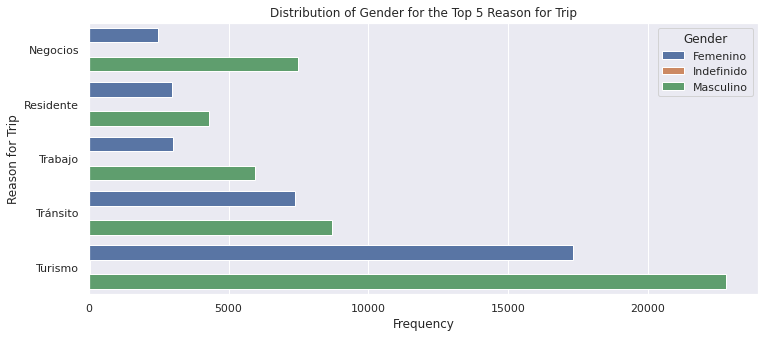

In [63]:
gender_per_count_df = genderbyorigincountry(df_migracion)
sns.set(rc = {'figure.figsize':(12,5)})
ax = sns.barplot(data=gender_per_count_df, x="Frequency", y='Reason for Trip', hue = 'Gender')
ax.set(title='Distribution of Gender for the Top 5 Reason for Trip', xlabel='Frequency', ylabel='Reason for Trip');